In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Our data contains not any null value

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Converting Year column to year_sold

In [7]:
df['Years_old'] = df['Year'].apply(lambda x : 2022 - x )

In [8]:
df.drop(['Year'], inplace = True, axis = 1)

In [9]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


## We will drop Car_Name feature because it is not going to help us much

In [10]:
df.drop('Car_Name', axis = 1 , inplace=True)

In [12]:
print(df.Fuel_Type.nunique())
print(df.Seller_Type.nunique())
print(df.Transmission.nunique())

3
2
2


## Making dummy variables

In [14]:
df = pd.get_dummies(df,drop_first=True)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


## Analysing correlation between independent features

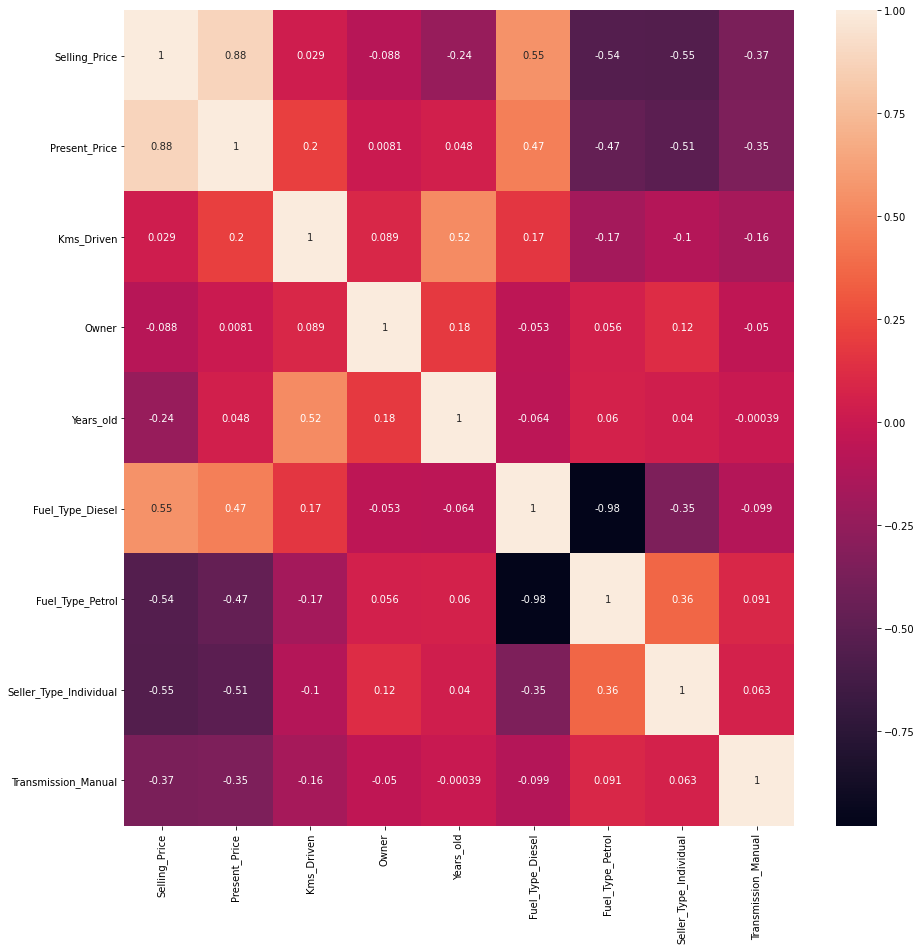

In [16]:
plt.figure(figsize=(15,15))
n = sns.heatmap(df.corr(),annot = True)

## Due to high correlation between two features --> 
### Fuel_Type_Diesel and Fuel_Type_Petrol, we are going to drop one feature

In [17]:
df.drop('Fuel_Type_Petrol',axis = 1, inplace = True)

## Seperating Independent and target variable

In [28]:
X = df.drop('Selling_Price', axis = 1)
Y = df['Selling_Price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state = 2)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 7), (91, 7), (210,), (91,))

## We are going to use Random Forest Regressor

In [52]:
gs = GridSearchCV(RandomForestRegressor(), {
       'n_estimators' : [10,20,30,40] 
}, cv = 5, return_train_score= False)

gs.fit(X_train,y_train)
Result = pd.DataFrame(gs.cv_results_)

In [53]:
Result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012207,0.001165,0.002201,0.000399,10,{'n_estimators': 10},0.801994,0.919645,0.878457,0.913378,0.953428,0.893380,0.051516,2
1,0.020004,0.000629,0.002401,0.000483,20,{'n_estimators': 20},0.880850,0.929834,0.927006,0.745465,0.961645,0.888960,0.076234,3
2,0.028601,0.000492,0.003007,0.000007,30,{'n_estimators': 30},0.873828,0.939568,0.907971,0.791689,0.966557,0.895923,0.060650,1
3,0.037821,0.000760,0.003795,0.000403,40,{'n_estimators': 40},0.852929,0.935153,0.867773,0.816302,0.958680,0.886167,0.052881,4


In [54]:
Result[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,10,0.893380
1,20,0.888960
2,30,0.895923
3,40,0.886167


## Hence we can see that 20 Decision Tress are good enough to predict value as per result

In [61]:
y_pred = gs.predict(X_test)

C:\Users\saqib\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

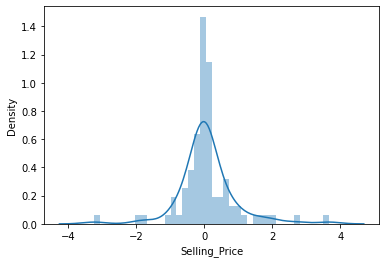

In [65]:
sns.distplot(y_test - y_pred)

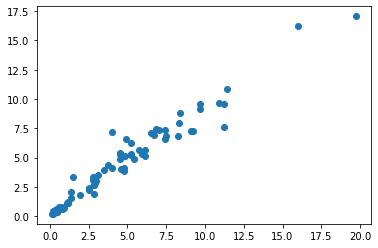

In [67]:
plt.scatter(y_test, y_pred)

In [60]:
y_pred = rf.predict(X_test)